# U.S. Medical Insurance Costs

## Scope of the work:
 * My overarching goal is to see if there is a story behind the data. 
 * The data will look at different population statistics by region, what factors lead to an increase in medical insurance cost, as well as how factors such as age or sex can affect likelikehood of being a smoker or having children.


### Import libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from numpy.polynomial.polynomial import polyfit
import warnings
warnings.filterwarnings('ignore')
insurance = pd.read_csv('insurance.csv')

##### Imported the insurance csv file and then converted all the columns to their own individual variables for easier accesibility later.


In [59]:
#columns to variables
age = insurance.age
sex = insurance.sex
bmi = insurance.bmi
children = insurance.children
smoker = insurance.smoker
region = insurance.region
charges = insurance.charges
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


#### There are 7 variables, not including the ID. Age is quantitative, sex is categorical/binary, bmi is quantitative, smoker is categorical/binary, region is categorical/nonbinary, charges is quantitative.

I ran a loop that converted all of the columns into barplots to see if there was any evident significance in any of the individual columns' distribution. The only thing that was evident from the data was that there was a significant number of 18 and 19 year olds compared to the other ages, and most of those who had insurance were nonsmokers

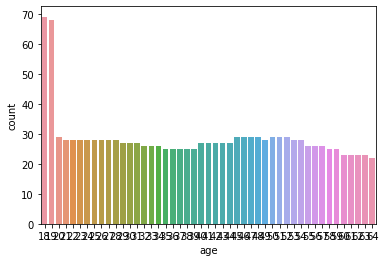

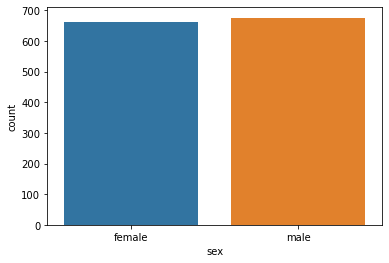

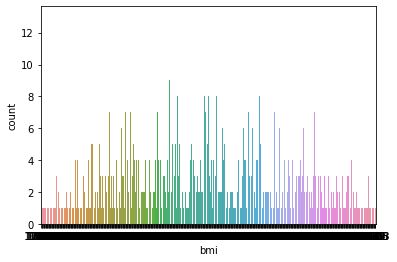

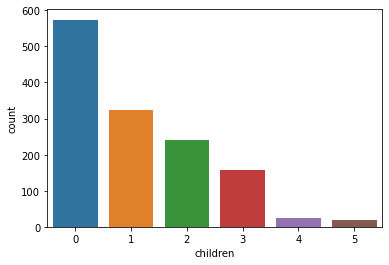

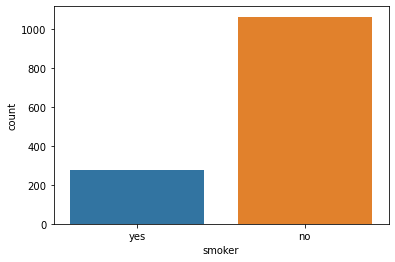

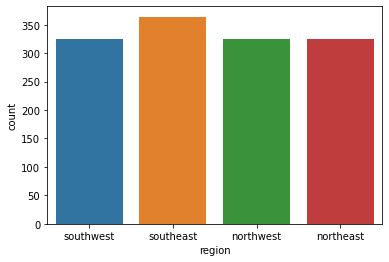

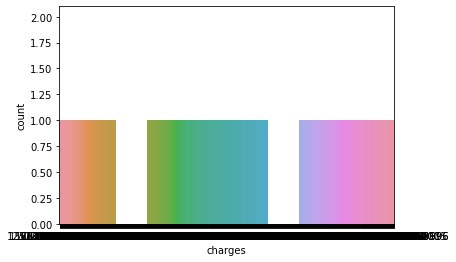

<Figure size 432x288 with 0 Axes>

In [4]:
columns = insurance.columns.tolist()
for column in columns:
    sns.countplot(insurance[column])
    plt.show()
    plt.clf()

There is no obvious cause as to why such a large number of 18 and 19 year olds have insurance compared to the other ages. An explanation would be that individuals in those age groups might still be in college and be playing a sport, which often requires some kind of insurance. Another explanation is that although insurance cost may start off cheap, increasing cost will deter insurance holders from keeping their policies, especially if they are near or below the poverty line.

##### Since some of the graphs still remain unclear, we will convert the bmi and charges into boxplots to get a better look.

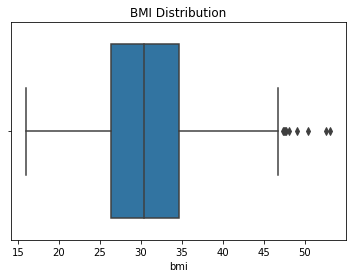

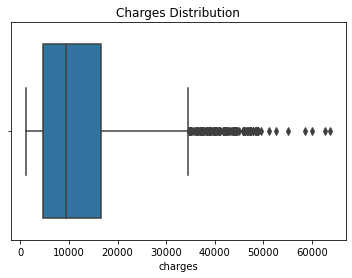

<Figure size 432x288 with 0 Axes>

In [5]:
sns.boxplot(x='bmi', data=insurance)
plt.title('BMI Distribution')
plt.show()
plt.clf()

sns.boxplot(x='charges', data=insurance)
plt.title('Charges Distribution')
plt.show()
plt.clf()

#### Finally, we will make a heat map to show where the strongest correlations lie in the variables.

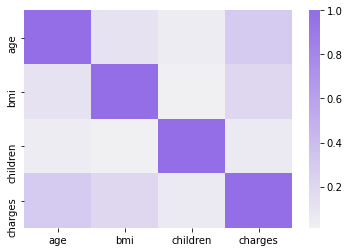

In [71]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(insurance.corr(), center=0, cmap=colors, robust=True)
plt.show()

The heatmap shows there is some correlation between age and charges, bmi and charges, and bmi and age. Since there is very little correlation between number of children and charges, we will not explore that relationship.

### Exploring the relationships by location

Assumptions of Tukey, ANOVA, and T-Tests is that the standard deviations of the groups should be close. We will check the standard deviation of the regions to see if standardization is necessary to continue.

In [8]:
#region variables
sw = region == 'southwest'
nw = region == 'northwest'
se = region == 'southeast'
ne = region == 'northeast'

print(np.std(se))
print(np.std(sw))
print(np.std(nw))
print(np.std(ne))

0.44501439231921086
0.42883506519289105
0.42883506519289105
0.42838609851365


The standard deviations are close enough where centering or scaling will not be needed.

#### Comparing age and region (categorical/nonbinary and quantitative)

In [10]:
sw_age = insurance.age[insurance.region == 'southwest']
se_age = insurance.age[insurance.region =='southeast']
nw_age = insurance.age[insurance.region == 'northwest']
ne_age = insurance.age[insurance.region == 'northeast']
fstat, pval = f_oneway(sw_age, se_age, nw_age, ne_age)
print(pval)

0.970989069987742


P value is .97, which means there is no statistical significance between age distribution of the regions. A boxplot also illustrates this.

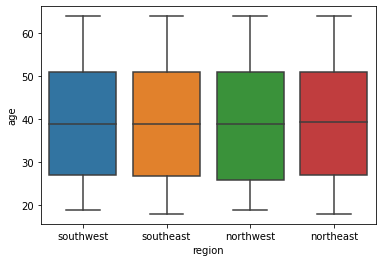

<Figure size 432x288 with 0 Axes>

In [13]:
sns.boxplot(x='region', y='age', data=insurance)
plt.show()
plt.clf()

#### Comparing region and bmi (categorical/nonbinary and quantitative) with tukey test and boxplots

In [18]:
tukey = pairwise_tukeyhsd(insurance.bmi, insurance.region, 0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263    0.9 -1.1552  1.2078  False
northeast southeast   4.1825  0.001   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562  0.001  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594  0.001 -3.9079 -1.6108   True
----------------------------------------------------------


Tukey test reveals there is a significant difference between difference in BMI among the regions. Boxplot below shows further that the bmi in the southeast is higher than the other regions. 

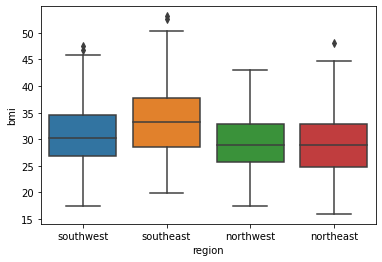

<function matplotlib.pyplot.clf()>

In [17]:
sw_bmi = insurance.bmi[insurance.region == 'southwest']
se_bmi = insurance.bmi[insurance.region =='southeast']
nw_bmi = insurance.bmi[insurance.region == 'northwest']
ne_bmi = insurance.bmi[insurance.region == 'northeast']

sns.boxplot(x='region', y='bmi', data=insurance)
plt.show()
plt.clf


Just as the Tukey Test revealed, there is a significant difference in the BMI of the individuals in the region except for between northeast and northwest. The southeast has the highest BMI distribution, however as shown by the distribution of ages in the previous graph, the bmi distribution of the regions does not effect the overall age distribution. 

#### Region and sex distribution (categorical/nonbinary and categorical/binary)

Since we are trying to decide if there is a meaningful significance between two categorical variables, we will use a chi square test.

In [5]:
sex_region = pd.crosstab(sex, region)
print(sex_region)

chi2, pval, dof, expected = chi2_contingency(sex_region)
print(pval)

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163
0.9328921288772233
0.43513679354327284


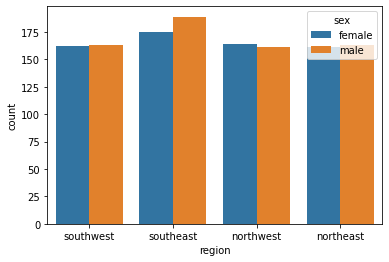

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='region', hue='sex', data =insurance)
plt.show()
plt.clf()

According to both the graph and the contingency table, the southeast not only has a higher population, but has the largest difference between the male and female population.

#### Region and number of children (categorical and quantitative)

In [11]:
sw_child = insurance.children[insurance.region == 'southwest']
se_child = insurance.children[insurance.region =='southeast']
nw_child = insurance.children[insurance.region == 'northwest']
ne_child = insurance.children[insurance.region == 'northeast']

print('The average number of children in the southwest: ' + str(sw_child.mean()))
print('The average number of children in the southeast: ' + str(se_child.mean()))
print('The average number of children in the northwest: ' + str(nw_child.mean()))
print('The average number of children in the northeast: ' + str(ne_child.mean()))

The average number of children in the southwest: 1.1415384615384616
The average number of children in the southeast: 1.0494505494505495
The average number of children in the northwest: 1.1476923076923078
The average number of children in the northeast: 1.0462962962962963


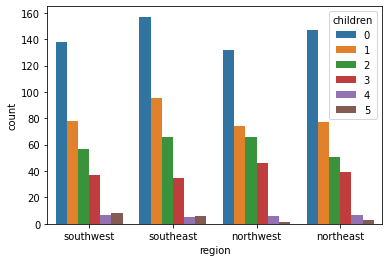

<Figure size 432x288 with 0 Axes>

In [18]:
unique_values, occurrence_count = np.unique()

sns.countplot(x='region', hue='children', data=insurance)
plt.show()
plt.clf()

The distribution of number of region across regions reveals that the southwest and northwest has a higher average of children, even though the previous graph revealed that the most amount of female to men population is the southeast.

#### Region and smoker status (categorical/nonbinary and categorical/binary)

In [42]:
table_v = pd.crosstab(smoker, region)
print(round(table_v / len(insurance), 2))

region  northeast  northwest  southeast  southwest
smoker                                            
no           0.19       0.20       0.20       0.20
yes          0.05       0.04       0.07       0.04


Contingency table shows that the most amount of smokers are in the southeast, followed by the northeast.

#### Region and charges distribution (categorical and quantitative)

In [13]:
# Region/charges variables
sw_charges = insurance.charges[insurance.region == 'southwest']
se_charges = insurance.charges[insurance.region =='southeast']
nw_charges = insurance.charges[insurance.region == 'northwest']
ne_charges = insurance.charges[insurance.region == 'northeast']

In [33]:
def get_charges(region):
    average = np.mean(region)
    return average

print('Average southeast charge is ' + str(get_charges(se_charges)))
print('Average southwest charge is ' + str(get_charges(sw_charges)))
print('Average northeast charge is ' + str(get_charges(ne_charges)))
print('Average northwest charge is ' + str(get_charges(nw_charges)))

Average southeast charge is 14735.411437609895
Average southwest charge is 12346.93737729231
Average northeast charge is 13406.3845163858
Average northwest charge is 12417.575373969228


Some conclusions can be made from this data:

 * The southeast has significantly higher medical insurance charges than any other region. The difference between the southeast and the second highest insurance region (northeast) was also the highest difference among the group, 1300 dollars. 

 * The difference between the two cheapest insurance (southwest and northwest) was also the one with the least amount of difference, 71 dollars.
 * The difference between east and west medical insurance cost is over 3000.

##### Checking variance with ANOVA

In [14]:
fstat, pval = f_oneway(sw_charges, se_charges, nw_charges, ne_charges)
print(pval)

0.0308933560705201


P value is less than the significance threshold of 0.05, therefore we will run a tukey test to see which pair of regions have a significant difference in medical insurance charges.

In [19]:
tukey = pairwise_tukeyhsd(insurance.charges, insurance.region, 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7002 -3428.9473  1451.329  False
northeast southeast  1329.0269 0.4754 -1044.9543 3703.0081  False
northeast southwest -1059.4471 0.6584 -3499.5853  1380.691  False
northwest southeast  2317.8361 0.0583    -54.212 4689.8842  False
northwest southwest    -70.638    0.9 -2508.8955 2367.6195  False
southeast southwest -2388.4741 0.0477 -4760.5221   -16.426   True
-----------------------------------------------------------------


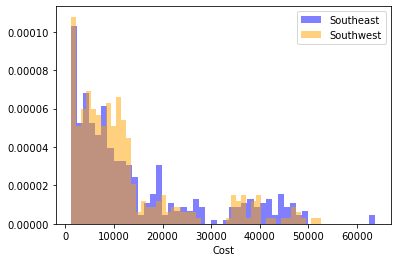

<Figure size 432x288 with 0 Axes>

In [35]:
plt.hist(insurance.charges[insurance.region == 'southeast'], label = 'Southeast', bins=50, density=True, alpha=.5, color='blue')
plt.hist(insurance.charges[insurance.region == 'southwest'], label = 'Southwest', bins=50, density=True, alpha=.5, color='orange')
plt.xlabel('Cost')
plt.legend()
plt.show()
plt.clf()

The reason that southeast has significantly higher charges is because much more of their clients pay over 40,000 dollars, compared to the southwest, where most of their spread lies within 0 and 10,000 dollars.  

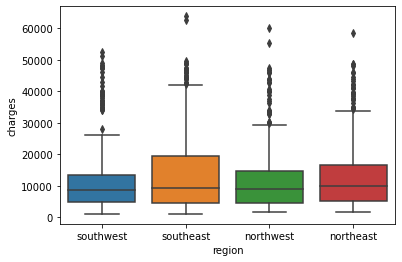

<Figure size 432x288 with 0 Axes>

In [27]:
sns.boxplot(x='region', y='charges', data=insurance)
plt.show()
plt.clf()

### Conclusions of relationship to region

 * The correlation to the high price in the southeast compared to the other three regions most likely has to do with the fact that the most amount of smokers live in the southeast. The smoker status by region data revealed that the two regions with the highest charges were also the ones with the most amount of smokers.

### Exploring relationships to charges to see what most effects cost.

Hypothesis moving forward is that smoker status is what most effects medical insurance cost. 

#### Relationship between cost of insurance and sex (quantitative and categorical/binary)

Average female cost is: 12569.57884383534
Average male cost is: 13956.751177721886
The difference in cost between male and female is 1387.1723338865468


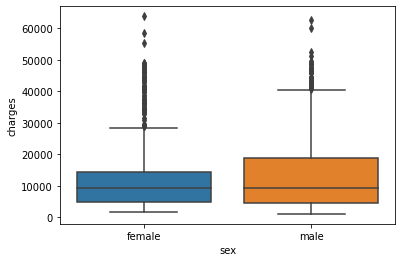

<Figure size 432x288 with 0 Axes>

In [47]:
female_cost = insurance.charges[insurance.sex == 'female']
male_cost = insurance.charges[insurance.sex == 'male']

avg_female_cost = np.mean(female_cost)
avg_male_cost = np.mean(male_cost)

print("Average female cost is: " + str(avg_female_cost))
print("Average male cost is: " + str(avg_male_cost))
print("The difference in cost between male and female is " + str(avg_male_cost - avg_female_cost) )

sns.boxplot(x='sex', y='charges', data=insurance)
plt.show()
plt.clf()


#### Relationship between cost of insurance and bmi (quantitative and quantitative)

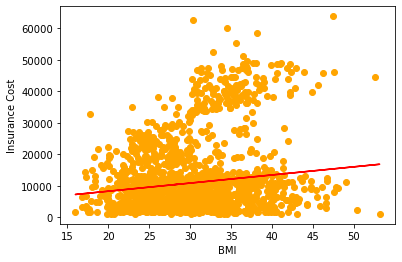

<Figure size 432x288 with 0 Axes>

In [73]:
x2=bmi
y2=charges


plt.scatter(x2, y2, color='orange')
m, b = np.polyfit(x1, y1, 1)
plt.plot(x2, m*x2+b, color='red')
plt.xlabel('BMI')
plt.ylabel('Insurance Cost')
plt.show()
plt.clf()

In [78]:
correlation, p = pearsonr(bmi, charges)
print(correlation)

0.19834096883362887


Correlation is only 0.2, meaning there is not a strong correlation between bmi and insurance

#### Relationship between cost of insurance and age (quantitative and quantitative)

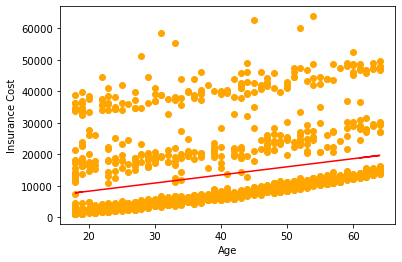

<Figure size 432x288 with 0 Axes>

In [52]:
x1=age
y1=charges


plt.scatter(x1, y1, color='orange')
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b, color='red')
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.show()
plt.clf()


Charges increase steadily per year, proving that there is significance between cost of medical insurance and age.

#### Relationship between cost of insurance and smoker status (quantitative and categorical/binary)

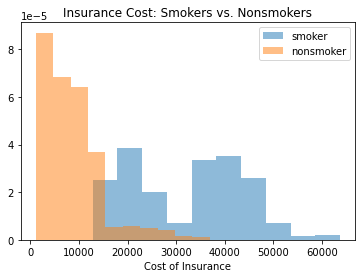

<Figure size 432x288 with 0 Axes>

In [51]:
plt.hist(insurance.charges[insurance.smoker == 'yes'],
         label = 'smoker',
         density = True,
         alpha=.5)
plt.hist(insurance.charges[insurance.smoker == 'no'],
         label = 'nonsmoker',
         density = True,
         alpha=.5)
plt.legend()
plt.xlabel('Cost of Insurance')
plt.title('Insurance Cost: Smokers vs. Nonsmokers')
plt.show()
plt.clf()


The histogram shows that the majority of nonsmokers do not get charged more than 30,000. However, smokers are almost exclusively charged above 30,000, and even reaching the 60,000 dollars range.

### Who is a smoker most likely to be?

#### Relationship between smokers/nonsmokers and gender (categorical/binary and cateogorical/binary)

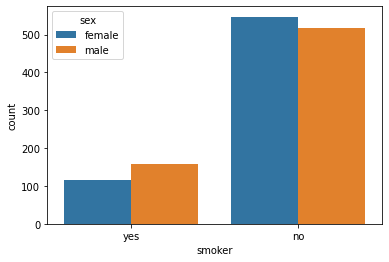

<Figure size 432x288 with 0 Axes>

In [76]:
sns.countplot(x='smoker', hue='sex', data=insurance)
plt.show()
plt.clf()

Men are more likely than women to be smokers. This is also explains why the cost for men was slightly higher than the cost for women.

#### Relationship between smokers/nonsmokers and bmi (categorical/binary and quantitative)

In [86]:
bmi_smoker = insurance.bmi[insurance.smoker == 'yes']
bmi_nonsmoker = insurance.bmi[insurance.smoker == 'no']

tstat, pval = ttest_ind(bmi_smoker, bmi_nonsmoker)
print(pval)

avg_bmi_smoker = np.mean(bmi_smoker)
avg_bmi_nonsmoker = np.mean(bmi_nonsmoker)
print("The average BMI for smokers is: " + str(avg_bmi_smoker))
print("The average BMI for nonsmokers is: " + str(avg_bmi_nonsmoker))

0.8909850280013041
The average BMI for smokers is: 30.708448905109503
The average BMI for nonsmokers is: 30.651795112781922


There is no significant correlation between smoking and BMI.

#### Relationship between smokers/nonsmokers and children (categorical/binary and quantitative)

In [91]:
child_smoker = insurance.children[insurance.smoker == 'yes']
child_nonsmoker = insurance.children[insurance.smoker == 'no']

tstat, pval = ttest_ind(child_smoker, child_nonsmoker)
print(pval)

avg_child_smoker = np.mean(child_smoker)
avg_child_nonsmoker = np.mean(child_nonsmoker)
print(avg_child_smoker)
print(avg_child_nonsmoker)

0.7791595656720584
1.1131386861313868
1.0902255639097744


There is no significant relationship between smokers and amount of children.

### What does gender affect?

#### Relationship between gender and bmi (categorical/binary and quantitative)

In [92]:
female_bmi = insurance.bmi[insurance.sex == 'female']
male_bmi = insurance.bmi[insurance.sex == 'male']

tstat, pval = ttest_ind(female_bmi, male_bmi)
print(pval)

0.08997637178984932


According to the pval, gender does not have signficant effect on BMI. Further proof below

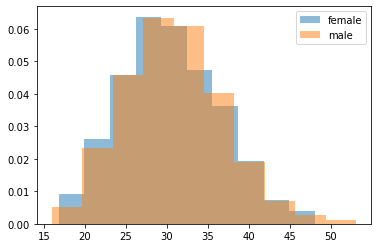

In [94]:
plt.hist(insurance.bmi[insurance.sex == 'female'],
         label = 'female',
         density = True,
         alpha=.5)
plt.hist(insurance.bmi[insurance.sex == 'male'],
         label = 'male',
         density = True,
         alpha=.5)
plt.legend()
plt.show()

#### Relationship between gender and children (categorical/binary and quantitative)

In [96]:
female_children = insurance.children[insurance.sex == 'female']
male_children = insurance.children[insurance.sex == 'male']

tstat, pval = ttest_ind(female_children, male_children)
print(pval)

0.5304897698759299


There is no significance between gender and number of children.